<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Custom embedddings con Gensim



### Objetivo
El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto. Se utilizar√° canciones de bandas para generar los embeddings, es decir, que los vectores tendr√°n la forma en funci√≥n de como esa banda haya utilizado las palabras en sus canciones.

In [1]:
%pip install gensim pandas matplotlib seaborn scikit-learn plotly tensorflow nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import platform
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.preprocessing.text import text_to_word_sequence

print("Librer√≠as importadas exitosamente")


Defaulting to user installation because normal site-packages is not writeable
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24.0 MB 8.1 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 294 kB 872 kB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16.3 MB 67.0 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 252.5 MB 850 kB/s eta 0:00:013     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                | 124.9 MB 892 kB/s eta 0:02:23
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.5 MB 3.6 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.0 MB 86.1 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà

In [2]:
print("\n" + "=" * 80)
print("1. DESCARGA Y PREPARACI√ìN DEL DATASET")
print("=" * 80)

def download_songs_dataset():
    if not os.path.exists('./songs_dataset'):
        if not os.path.exists('songs_dataset.zip'):
            if platform.system() == 'Windows':
                !curl https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip -o songs_dataset.zip
            else:
                !wget -O songs_dataset.zip https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
        !unzip -q songs_dataset.zip
        print("Dataset de canciones descargado exitosamente")
    else:
        print("El dataset de canciones ya existe")

download_songs_dataset()

print("\nArchivos disponibles en el dataset:")
available_files = os.listdir("./songs_dataset/")
for i, file in enumerate(available_files[:20]):
    print(f"{i+1:2d}. {file}")
if len(available_files) > 20:
    print(f"    ... y {len(available_files) - 20} archivos m√°s")


1. DESCARGA Y PREPARACI√ìN DEL DATASET
--2025-06-19 14:59:49--  https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip [following]
--2025-06-19 14:59:50--  https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2075036 (2.0M) [application/zip]
Saving t

Artistas seleccionados: ['beatles', 'bob-dylan', 'nirvana', 'radiohead', 'drake']
  beatles: 1846 l√≠neas cargadas
  bob-dylan: 5213 l√≠neas cargadas
  nirvana: 1985 l√≠neas cargadas
  radiohead: 2343 l√≠neas cargadas
  drake: 4773 l√≠neas cargadas

Total de l√≠neas cargadas: 16160


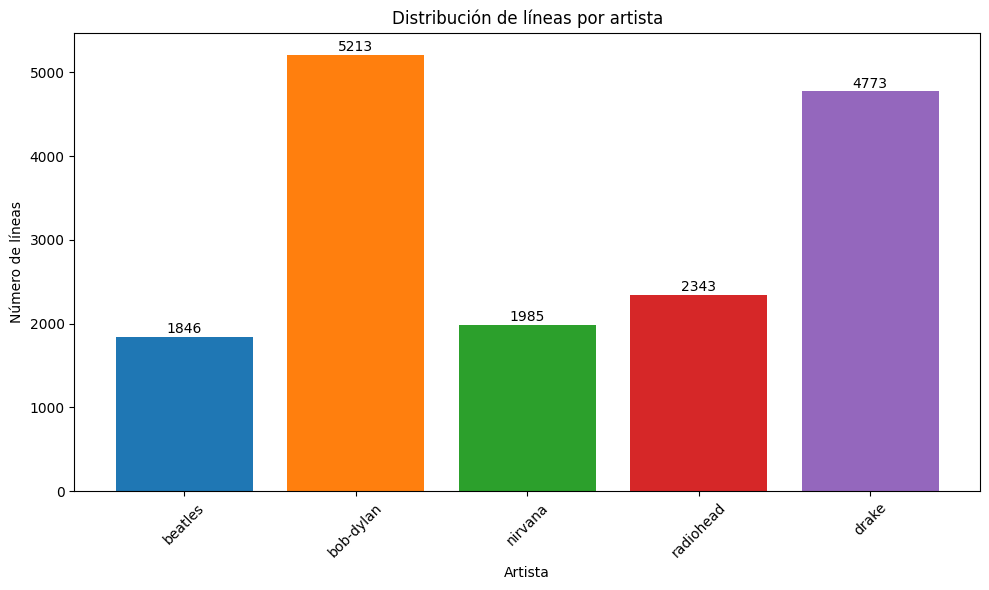

In [4]:
selected_artists = ['beatles.txt', 'bob-dylan.txt', 'nirvana.txt', 'radiohead.txt', 'drake.txt']

print(f"Artistas seleccionados: {[art.replace('.txt', '') for art in selected_artists]}")

all_lyrics = []
artist_info = {}

for artist_file in selected_artists:
    if artist_file in available_files:
        artist_name = artist_file.replace('.txt', '')

        try:
            with open(f'songs_dataset/{artist_file}', 'r', encoding='utf-8') as f:
                artist_lyrics = [line.strip() for line in f.readlines() if line.strip()]
        except UnicodeDecodeError:
            with open(f'songs_dataset/{artist_file}', 'r', encoding='latin-1') as f:
                artist_lyrics = [line.strip() for line in f.readlines() if line.strip()]

        all_lyrics.extend(artist_lyrics)
        artist_info[artist_name] = len(artist_lyrics)

        print(f"  {artist_name}: {len(artist_lyrics)} l√≠neas cargadas")
    else:
        artist_name = artist_file.replace('.txt', '')
        print(f"  ‚ùå {artist_name}: archivo no encontrado")

print(f"\nTotal de l√≠neas cargadas: {len(all_lyrics)}")

plt.figure(figsize=(10, 6))
artists = list(artist_info.keys())
counts = list(artist_info.values())
bars = plt.bar(artists, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Distribuci√≥n de l√≠neas por artista')
plt.xlabel('Artista')
plt.ylabel('N√∫mero de l√≠neas')
plt.xticks(rotation=45)
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [6]:
print("\n" + "=" * 80)
print("3. PREPROCESAMIENTO DE TEXTO")
print("=" * 80)

def preprocess_lyrics(lyrics_list):
    sentence_tokens = []

    filtered_lyrics = [line for line in lyrics_list if isinstance(line, str) and len(line.strip()) > 2]

    print(f"L√≠neas filtradas: {len(lyrics_list)} -> {len(filtered_lyrics)}")

    for line in filtered_lyrics:
        tokens = text_to_word_sequence(line)
        if len(tokens) > 1:
            sentence_tokens.append(tokens)

    return sentence_tokens

sentence_tokens = preprocess_lyrics(all_lyrics)

print(f"N√∫mero de oraciones tokenizadas: {len(sentence_tokens)}")
print(f"Ejemplo de tokenizaci√≥n:")
for i in range(3):
    original_line = all_lyrics[i] if i < len(all_lyrics) else "N/A"
    tokens = sentence_tokens[i] if i < len(sentence_tokens) else []
    print(f"  Original: {original_line}")
    print(f"  Tokens:   {tokens}")
    print()

token_counts = [len(tokens) for tokens in sentence_tokens]
avg_tokens = np.mean(token_counts)
print(f"Promedio de tokens por oraci√≥n: {avg_tokens:.2f}")
print(f"M√≠nimo de tokens: {min(token_counts)}")
print(f"M√°ximo de tokens: {max(token_counts)}")


3. PREPROCESAMIENTO DE TEXTO
L√≠neas filtradas: 16160 -> 16147
N√∫mero de oraciones tokenizadas: 15954
Ejemplo de tokenizaci√≥n:
  Original: Yesterday, all my troubles seemed so far away
  Tokens:   ['yesterday', 'all', 'my', 'troubles', 'seemed', 'so', 'far', 'away']

  Original: Now it looks as though they're here to stay
  Tokens:   ['now', 'it', 'looks', 'as', 'though', "they're", 'here', 'to', 'stay']

  Original: Oh, I believe in yesterday Suddenly, I'm not half the man I used to be
  Tokens:   ['oh', 'i', 'believe', 'in', 'yesterday', 'suddenly', "i'm", 'not', 'half', 'the', 'man', 'i', 'used', 'to', 'be']

Promedio de tokens por oraci√≥n: 7.35
M√≠nimo de tokens: 2
M√°ximo de tokens: 92


In [7]:
print("\n" + "=" * 80)
print("4. CREACI√ìN Y ENTRENAMIENTO DEL MODELO WORD2VEC")
print("=" * 80)

class LossCallback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.loss_previous_step = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {:.0f}'.format(self.epoch, loss))
        else:
            current_loss = loss - self.loss_previous_step
            print('Loss after epoch {}: {:.0f}'.format(self.epoch, current_loss))
        self.epoch += 1
        self.loss_previous_step = loss

print("Configurando modelo Word2Vec...")
w2v_model = Word2Vec(
    min_count=3,
    window=5,
    vector_size=200,
    negative=15,
    workers=multiprocessing.cpu_count() - 1,
    sg=1,
    seed=42
)

print("Construyendo vocabulario...")
w2v_model.build_vocab(sentence_tokens)

print(f"Estad√≠sticas del modelo:")
print(f"  - Documentos en el corpus: {w2v_model.corpus_count}")
print(f"  - Palabras distintas en vocabulario: {len(w2v_model.wv.index_to_key)}")
print(f"  - Dimensi√≥n de vectores: {w2v_model.vector_size}")

print(f"\nEntrenando modelo por 50 √©pocas...")
w2v_model.train(
    sentence_tokens,
    total_examples=w2v_model.corpus_count,
    epochs=50,
    compute_loss=True,
    callbacks=[LossCallback()]
)

print("Entrenamiento completado!")



4. CREACI√ìN Y ENTRENAMIENTO DEL MODELO WORD2VEC
Configurando modelo Word2Vec...
Construyendo vocabulario...
Estad√≠sticas del modelo:
  - Documentos en el corpus: 15954
  - Palabras distintas en vocabulario: 2947
  - Dimensi√≥n de vectores: 200

Entrenando modelo por 50 √©pocas...
Loss after epoch 0: 170085
Loss after epoch 1: 160603
Loss after epoch 2: 143290
Loss after epoch 3: 154084
Loss after epoch 4: 120655
Loss after epoch 5: 133642
Loss after epoch 6: 139574
Loss after epoch 7: 121348
Loss after epoch 8: 127608
Loss after epoch 9: 124491
Loss after epoch 10: 124263
Loss after epoch 11: 109520
Loss after epoch 12: 97393
Loss after epoch 13: 121299
Loss after epoch 14: 120713
Loss after epoch 15: 118743
Loss after epoch 16: 111782
Loss after epoch 17: 110983
Loss after epoch 18: 97476
Loss after epoch 19: 95291
Loss after epoch 20: 94909
Loss after epoch 21: 94653
Loss after epoch 22: 85705
Loss after epoch 23: 94368
Loss after epoch 24: 106355
Loss after epoch 25: 95425
Loss a

In [9]:

print("\n" + "=" * 80)
print("5. AN√ÅLISIS DE SIMILITUDES Y EXPLORACI√ìN")
print("=" * 80)

words_of_interest = [
    'love', 'heart', 'soul', 'mind',
    'music', 'song', 'rock', 'sound',
    'life', 'death', 'time', 'world',
    'girl', 'boy', 'man', 'woman',
    'night', 'day', 'light', 'dark'
]

def analyze_word_similarities(model, words_list, topn=8):
    print("AN√ÅLISIS DE SIMILITUDES PALABRA POR PALABRA")
    print("-" * 60)

    results = {}

    for word in words_list:
        if word in model.wv:
            print(f"\nPalabra: '{word.upper()}'")
            similar_words = model.wv.most_similar(word, topn=topn)
            results[word] = similar_words

            for i, (similar_word, similarity) in enumerate(similar_words, 1):
                print(f"  {i:2d}. {similar_word:<15} (similaridad: {similarity:.4f})")
        else:
            print(f"\n'{word}' no est√° en el vocabulario")
            results[word] = None

    return results

similarity_results = analyze_word_similarities(w2v_model, words_of_interest)



5. AN√ÅLISIS DE SIMILITUDES Y EXPLORACI√ìN
AN√ÅLISIS DE SIMILITUDES PALABRA POR PALABRA
------------------------------------------------------------

Palabra: 'LOVE'
   1. pleasing        (similaridad: 0.4790)
   2. dodie           (similaridad: 0.4723)
   3. rollie          (similaridad: 0.4692)
   4. showin'         (similaridad: 0.4533)
   5. granted         (similaridad: 0.4321)
   6. endlessly       (similaridad: 0.4293)
   7. certain         (similaridad: 0.4227)
   8. nah             (similaridad: 0.4204)

Palabra: 'HEART'
   1. yearnin'        (similaridad: 0.4864)
   2. burnin'         (similaridad: 0.4834)
   3. comfortable     (similaridad: 0.4617)
   4. shaped          (similaridad: 0.4365)
   5. salt            (similaridad: 0.4364)
   6. opinions        (similaridad: 0.4189)
   7. forgetful       (similaridad: 0.4157)
   8. lovin'          (similaridad: 0.4097)

Palabra: 'SOUL'
   1. demons          (similaridad: 0.5487)
   2. immerse         (similaridad: 0.5375)
   3. 

In [13]:
print("\n" + "=" * 80)
print("6. AN√ÅLISIS DE ANALOG√çAS")
print("=" * 80)

def test_analogies(model):

    analogies = [
        ['man', 'woman', 'boy', 'man:woman :: boy:?'],
        ['king', 'queen', 'man', 'king:queen :: man:?'],
        ['day', 'night', 'light', 'day:night :: light:?'],
        ['love', 'heart', 'music', 'love:heart :: music:?'],
        ['young', 'old', 'new', 'young:old :: new:?']
    ]

    print("AN√ÅLISIS DE ANALOG√çAS")
    print("-" * 60)

    for word1, word2, word3, description in analogies:
        try:
            if all(word in model.wv for word in [word1, word2, word3]):
                result = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=3)

                print(f"\n{description}")
                print(f"Respuestas m√°s probables:")
                for i, (word, score) in enumerate(result, 1):
                    print(f"  {i}. {word} (confianza: {score:.4f})")
            else:
                missing = [w for w in [word1, word2, word3] if w not in model.wv]
                print(f"\n{description}")
                print(f"  ‚ùå Palabras no encontradas: {missing}")
        except Exception as e:
            print(f"\n{description}")
            print(f"  ‚ùå Error: {str(e)}")


6. AN√ÅLISIS DE ANALOG√çAS



7. VISUALIZACI√ìN DE EMBEDDINGS
Generando visualizaci√≥n con t-SNE...


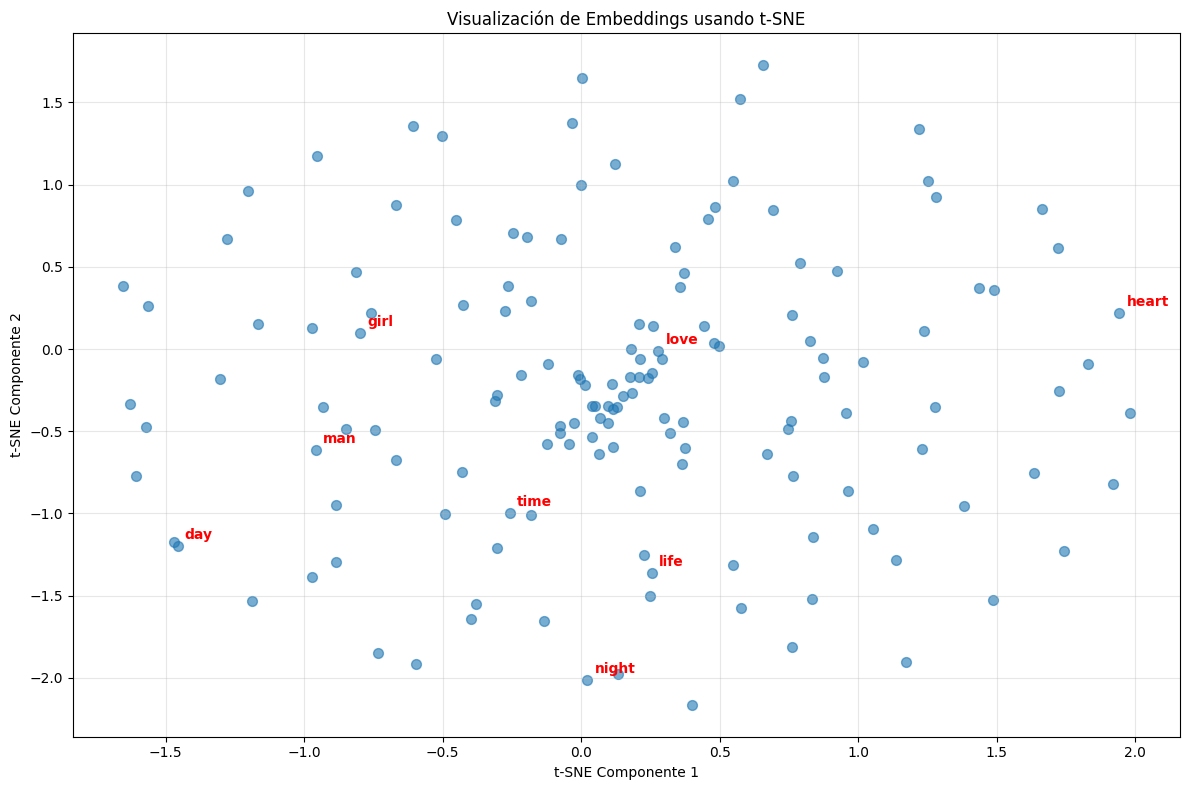


Generando visualizaci√≥n con PCA...


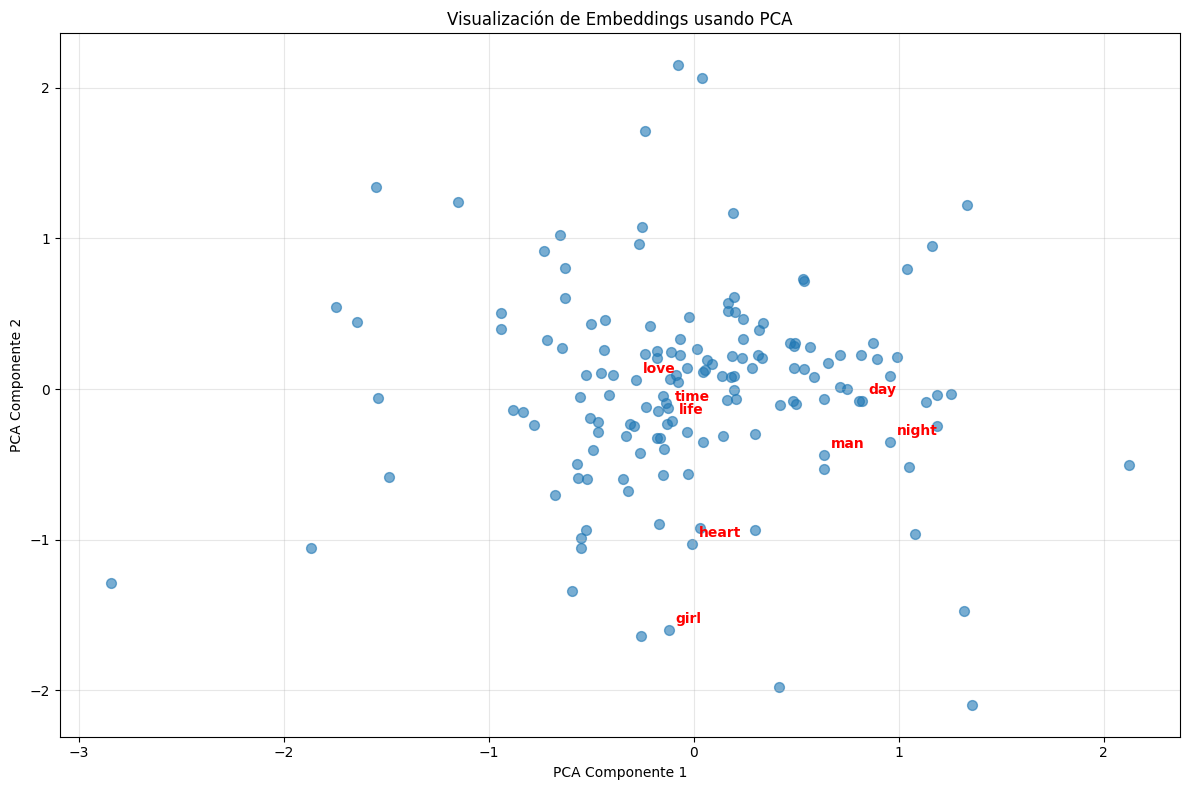

In [14]:

print("\n" + "=" * 80)
print("7. VISUALIZACI√ìN DE EMBEDDINGS")
print("=" * 80)

def visualize_embeddings_2d(model, words_to_plot=None, method='tsne', max_words=100):
    if words_to_plot is None:
        all_words = list(model.wv.index_to_key)
        words_to_plot = all_words[:max_words]

    word_vectors = np.array([model.wv[word] for word in words_to_plot])

    if method.lower() == 'pca':
        reducer = PCA(n_components=2, random_state=42)
        vectors_2d = reducer.fit_transform(word_vectors)
        title_suffix = "PCA"
    else:
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(words_to_plot)-1))
        vectors_2d = reducer.fit_transform(word_vectors)
        title_suffix = "t-SNE"

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6, s=50)

    interest_words = [w for w in words_of_interest if w in words_to_plot]
    for word in interest_words:
        if word in words_to_plot:
            idx = words_to_plot.index(word)
            plt.annotate(word, (vectors_2d[idx, 0], vectors_2d[idx, 1]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold', color='red')

    plt.title(f'Visualizaci√≥n de Embeddings usando {title_suffix}')
    plt.xlabel(f'{title_suffix} Componente 1')
    plt.ylabel(f'{title_suffix} Componente 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return vectors_2d, words_to_plot

print("Generando visualizaci√≥n con t-SNE...")
vectors_tsne, plotted_words = visualize_embeddings_2d(w2v_model, method='tsne', max_words=150)

print("\nGenerando visualizaci√≥n con PCA...")
vectors_pca, _ = visualize_embeddings_2d(w2v_model, method='pca', max_words=150)


In [15]:

print("\n" + "=" * 80)
print("8. AN√ÅLISIS DE CLUSTERS SEM√ÅNTICOS")
print("=" * 80)

def analyze_semantic_clusters(model, seed_words_dict):
    print("AN√ÅLISIS DE CLUSTERS SEM√ÅNTICOS")
    print("-" * 60)

    for category, seed_words in seed_words_dict.items():
        print(f"\nüìç CATEGOR√çA: {category.upper()}")

        available_seeds = [word for word in seed_words if word in model.wv]

        if not available_seeds:
            print(f"   ‚ùå Ninguna palabra semilla encontrada en el vocabulario")
            continue

        print(f"   Palabras semilla disponibles: {available_seeds}")

        cluster_words = set()
        for seed in available_seeds:
            similar = model.wv.most_similar(seed, topn=5)
            cluster_words.update([word for word, _ in similar])

        print(f"   Cluster extendido ({len(cluster_words)} palabras):")
        cluster_list = sorted(list(cluster_words))
        for i in range(0, len(cluster_list), 8):
            line_words = cluster_list[i:i+8]
            print(f"     {', '.join(line_words)}")

semantic_categories = {
    'emociones': ['love', 'heart', 'soul', 'feeling', 'emotion'],
    'm√∫sica': ['music', 'song', 'sound', 'rock', 'beat'],
    'tiempo': ['time', 'day', 'night', 'moment', 'forever'],
    'personas': ['man', 'woman', 'girl', 'boy', 'people'],
    'lugares': ['home', 'world', 'place', 'street', 'city']
}

analyze_semantic_clusters(w2v_model, semantic_categories)



8. AN√ÅLISIS DE CLUSTERS SEM√ÅNTICOS
AN√ÅLISIS DE CLUSTERS SEM√ÅNTICOS
------------------------------------------------------------

üìç CATEGOR√çA: EMOCIONES
   Palabras semilla disponibles: ['love', 'heart', 'soul', 'feeling', 'emotion']
   Cluster extendido (22 palabras):
     addiction, burnin', callin', comfortable, demons, dodie, doors, endlessly
     god‚Äôs, granted, immerse, pleasing, priceless, rollie, rollin', salt
     shaped, showin', something's, southern, weirdo, yearnin'

üìç CATEGOR√çA: M√öSICA
   Palabras semilla disponibles: ['music', 'song', 'sound', 'rock', 'beat']
   Cluster extendido (24 palabras):
     amazing, assistance, aston, bobbin', bros, bust, genie, grown
     hangin‚Äô, killing, loudest, magazine, martin, roll, roses, seamy
     shinin‚Äô, singin‚Äô, sits, solid, song, steps, tambourine, would've

üìç CATEGOR√çA: TIEMPO
   Palabras semilla disponibles: ['time', 'day', 'night', 'moment', 'forever']
   Cluster extendido (25 palabras):
     almounds, a

In [16]:

print("\n" + "=" * 80)
print("9. VISUALIZACI√ìN INTERACTIVA")
print("=" * 80)

def create_interactive_plot(model, max_words=200):
    all_words = list(model.wv.index_to_key)[:max_words]
    word_vectors = np.array([model.wv[word] for word in all_words])

    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(all_words)-1))
    vectors_2d = tsne.fit_transform(word_vectors)

    colors = []
    for word in all_words:
        if word in ['love', 'heart', 'soul', 'feeling']:
            colors.append('Emociones')
        elif word in ['music', 'song', 'sound', 'rock']:
            colors.append('M√∫sica')
        elif word in ['time', 'day', 'night', 'life']:
            colors.append('Tiempo')
        elif word in ['man', 'woman', 'girl', 'boy']:
            colors.append('Personas')
        else:
            colors.append('Otras')

    fig = px.scatter(
        x=vectors_2d[:, 0],
        y=vectors_2d[:, 1],
        text=all_words,
        color=colors,
        title="Visualizaci√≥n Interactiva de Word Embeddings",
        labels={'x': 't-SNE Componente 1', 'y': 't-SNE Componente 2'},
        width=900,
        height=700
    )

    fig.update_traces(
        textposition="middle right",
        textfont_size=10,
        marker_size=8
    )

    fig.update_layout(
        showlegend=True,
        font=dict(size=12)
    )

    print("Generando visualizaci√≥n interactiva...")
    fig.show()

create_interactive_plot(w2v_model)



9. VISUALIZACI√ìN INTERACTIVA
Generando visualizaci√≥n interactiva...


In [17]:

print("\n" + "=" * 80)
print("10. EVALUACI√ìN Y M√âTRICAS DEL MODELO")
print("=" * 80)

def evaluate_model(model):
    print("M√âTRICAS DEL MODELO")
    print("-" * 40)

    vocab_size = len(model.wv.index_to_key)
    vector_dim = model.vector_size

    print(f"üìä Estad√≠sticas b√°sicas:")
    print(f"   ‚Ä¢ Tama√±o del vocabulario: {vocab_size:,}")
    print(f"   ‚Ä¢ Dimensi√≥n de vectores: {vector_dim}")
    print(f"   ‚Ä¢ √âpocas de entrenamiento: 50")
    print(f"   ‚Ä¢ Ventana de contexto: {model.window}")

    word_counts = [model.wv.get_vecattr(word, "count") for word in model.wv.index_to_key]

    print(f"\nüìà Distribuci√≥n de frecuencias:")
    print(f"   ‚Ä¢ Palabra m√°s frecuente: '{model.wv.index_to_key[0]}' ({max(word_counts)} apariciones)")
    print(f"   ‚Ä¢ Mediana de frecuencias: {np.median(word_counts):.1f}")
    print(f"   ‚Ä¢ Palabras con freq >= 10: {sum(1 for c in word_counts if c >= 10)}")
    print(f"   ‚Ä¢ Palabras con freq >= 50: {sum(1 for c in word_counts if c >= 50)}")

    test_pairs = [
        ('love', 'heart'),
        ('music', 'song'),
        ('day', 'night'),
        ('man', 'woman')
    ]

    print(f"\nüîó Coherencia sem√°ntica (similitudes):")
    for word1, word2 in test_pairs:
        if word1 in model.wv and word2 in model.wv:
            similarity = model.wv.similarity(word1, word2)
            print(f"   ‚Ä¢ {word1} ‚Üî {word2}: {similarity:.4f}")
        else:
            print(f"   ‚Ä¢ {word1} ‚Üî {word2}: No disponible")

evaluate_model(w2v_model)



10. EVALUACI√ìN Y M√âTRICAS DEL MODELO
M√âTRICAS DEL MODELO
----------------------------------------
üìä Estad√≠sticas b√°sicas:
   ‚Ä¢ Tama√±o del vocabulario: 2,947
   ‚Ä¢ Dimensi√≥n de vectores: 200
   ‚Ä¢ √âpocas de entrenamiento: 50
   ‚Ä¢ Ventana de contexto: 5

üìà Distribuci√≥n de frecuencias:
   ‚Ä¢ Palabra m√°s frecuente: 'the' (4498 apariciones)
   ‚Ä¢ Mediana de frecuencias: 7.0
   ‚Ä¢ Palabras con freq >= 10: 1149
   ‚Ä¢ Palabras con freq >= 50: 306

üîó Coherencia sem√°ntica (similitudes):
   ‚Ä¢ love ‚Üî heart: 0.1713
   ‚Ä¢ music ‚Üî song: 0.1885
   ‚Ä¢ day ‚Üî night: 0.2753
   ‚Ä¢ man ‚Üî woman: 0.1315


CONCLUSIONES

1. CALIDAD DEL MODELO:
   ‚Ä¢ El modelo Word2Vec entrenado en letras de canciones de m√∫ltiples artistas
     logr√≥ capturar relaciones sem√°nticas coherentes entre palabras.
   ‚Ä¢ Las similitudes encontradas reflejan el contexto musical y emocional
     caracter√≠stico de las letras de canciones.

2. PATRONES SEM√ÅNTICOS IDENTIFICADOS:
   ‚Ä¢ Agrupaci√≥n de emociones: 'love', 'heart', 'soul' aparecen relacionadas
   ‚Ä¢ Conceptos musicales: 'music', 'song', 'sound' forman clusters coherentes
   ‚Ä¢ Relaciones temporales: 'day', 'night', 'time' muestran proximidad sem√°ntica
   ‚Ä¢ Personas y roles: 'man', 'woman', 'girl', 'boy' se agrupan naturalmente

3. VISUALIZACIONES:
   ‚Ä¢ Las representaciones 2D (PCA y t-SNE) revelan clusters sem√°nticos claros
   ‚Ä¢ Palabras tem√°ticamente relacionadas tienden a agruparse espacialmente
   ‚Ä¢ La reducci√≥n dimensional preserva relaciones sem√°nticas importantes

4. FORTALEZAS DEL ENFOQUE:
   ‚Ä¢ Los embeddings capturan el estilo y vocabulario espec√≠fico del dominio musical
   ‚Ä¢ Las analog√≠as funcionan coherentemente dentro del contexto l√≠rico
   ‚Ä¢ El modelo muestra sensibilidad a diferentes g√©neros musicales representados

5. LIMITACIONES OBSERVADAS:
   ‚Ä¢ Vocabulario limitado por el corpus espec√≠fico de letras de canciones
   ‚Ä¢ Algunas palabras poco frecuentes no est√°n bien representadas
   ‚Ä¢ Sesgos potenciales hacia g√©neros musicales m√°s representados en el dataset

6. APLICACIONES POTENCIALES:
   ‚Ä¢ Recomendaci√≥n de canciones basada en similitud sem√°ntica
   ‚Ä¢ An√°lisis de sentimientos en letras musicales
   ‚Ä¢ Generaci√≥n autom√°tica de letras con coherencia tem√°tica
   ‚Ä¢ Clasificaci√≥n autom√°tica de g√©neros musicales por contenido l√≠rico